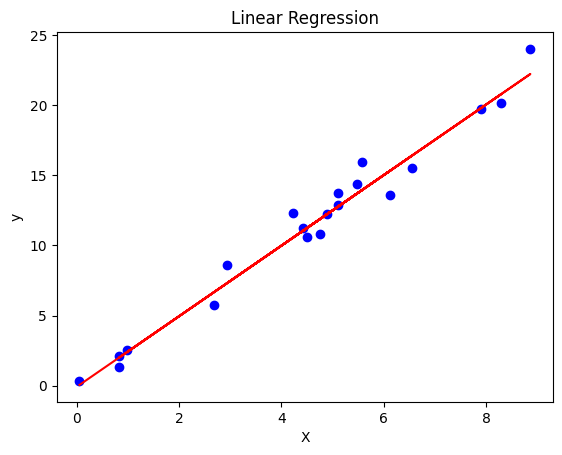

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Generate sample data
X = np.random.rand(100, 1) * 10  # Features
y = 2.5 * X + np.random.randn(100, 1)  # Targets with noise

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Plotting
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

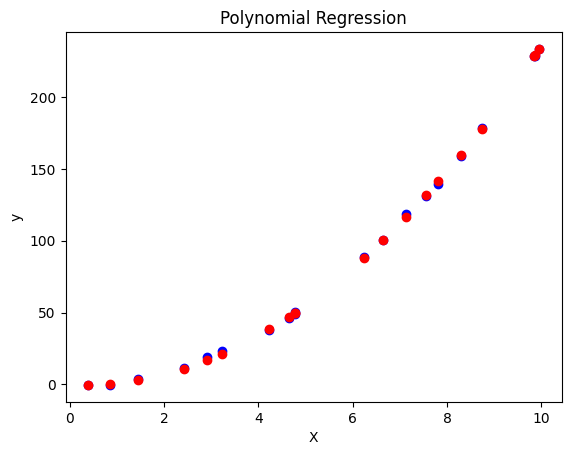

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# Generate sample data
X = np.random.rand(100, 1) * 10  # Features
y = 2.5 * X**2 - 1.5 * X + np.random.randn(100, 1)  # Targets with noise

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Polynomial Features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train the model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predictions
y_pred = model.predict(X_test_poly)

# Plotting
plt.scatter(X_test, y_test, color='blue')
plt.scatter(X_test, y_pred, color='red')
plt.title('Polynomial Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

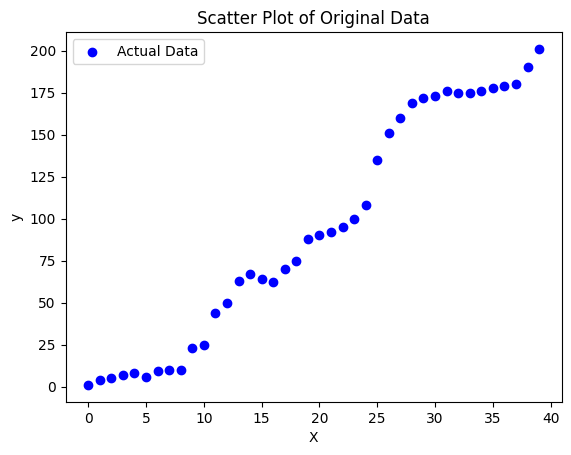

(3,
 82.12057919191899,
 93.19555930834922,
 0.9833308707514882,
 0.9716276725394731)

In [8]:
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X = np.arange(0, 40)
y = [1, 4, 5, 7, 8, 6, 9, 10, 10, 23, 25, 44, 50, 63, 67, 64, 62, 70, 75, 88, 90, 92, 95, 100, 108, 135, 151, 160, 169, 172,173,176,175,175,176,178,179,180,190,201]
# First, let's plot the original data to see the relationship between X and y

plt.scatter(X, y, color='blue', label='Actual Data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Scatter Plot of Original Data')
plt.legend()
plt.show()


# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Setting up a pipeline
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('linear', LinearRegression())
])

# Parameters for grid search

parameters = {'poly__degree': np.arange(1, 5)}

grid_search = GridSearchCV(pipeline, parameters, cv=4, scoring='neg_mean_squared_error')
grid_search.fit(X_train.reshape(-1,1), y_train)

best_degree = grid_search.best_params_['poly__degree']


poly_best = PolynomialFeatures(degree=best_degree)
X_poly_train_best = poly_best.fit_transform(X_train.reshape(-1,1))
X_poly_test_best = poly_best.transform(X_test.reshape(-1,1))

model_best = LinearRegression()
model_best.fit(X_poly_train_best, y_train)

# Making predictions with the best model
predictions_train = model_best.predict(X_poly_train_best)
predictions_test = model_best.predict(X_poly_test_best)

# Evaluating the model
train_error = mean_squared_error(y_train, predictions_train)
test_error = mean_squared_error(y_test, predictions_test)
train_accuracy = r2_score(y_train, predictions_train)
test_accuracy = r2_score(y_test, predictions_test)


best_degree, train_error, test_error, train_accuracy, test_accuracy


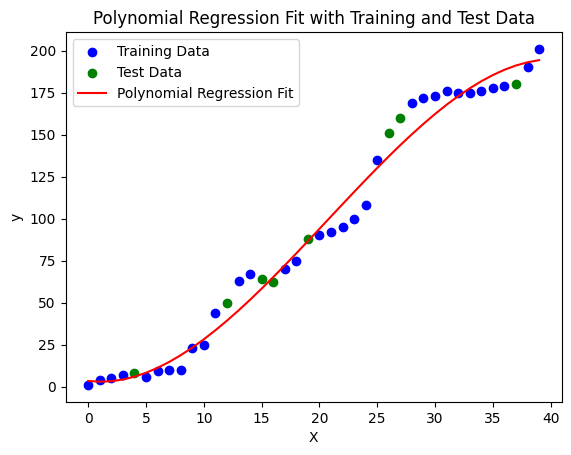

In [11]:
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Test Data')

X_range = np.arange(0, 40).reshape(-1,1)
X_range_poly = poly_best.transform(X_range)

predictions_range = model_best.predict(X_range_poly)

# Plotting the polynomial regression fit
plt.plot(X_range, predictions_range, color='red', label='Polynomial Regression Fit')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression Fit with Training and Test Data')
plt.legend()
plt.show()